**Set environment**

In [1]:
suppressWarnings(suppressMessages(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import FCC data

In [2]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.total.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac_fcc_total = dat
print(dim(dat))
head(dat)

[1] 732434      7


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
chr1,100006256,100006880,chr1:100006256-100006880,-0.01311792,ASTARR,ASTARR_T
chr1,100010437,100010915,chr1:100010437-100010915,-0.80687947,ASTARR,ASTARR_T
chr1,10002087,10003910,chr1:10002087-10003910,-0.34892859,ASTARR,ASTARR_T
chr1,100021298,100021629,chr1:100021298-100021629,-1.03799571,ASTARR,ASTARR_T
chr1,100023727,100023976,chr1:100023727-100023976,-0.19100207,ASTARR,ASTARR_T
chr1,100027983,100029702,chr1:100027983-100029702,-0.18001582,ASTARR,ASTARR_T


In [3]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.active.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac_fcc_active = dat
print(dim(dat))
head(dat)

[1] 167127      6


Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,101198203,101199537,chr1:101198203-101199537,ASTARR,ASTARR_AB
chr1,1012902,1014502,chr1:1012902-1014502,ASTARR,ASTARR_AB
chr1,109213422,109215054,chr1:109213422-109215054,ASTARR,ASTARR_AB
chr1,109218538,109219133,chr1:109218538-109219133,ASTARR,ASTARR_AB
chr1,109388963,109390708,chr1:109388963-109390708,ASTARR,ASTARR_AB
chr1,109476546,109477209,chr1:109476546-109477209,ASTARR,ASTARR_AB


In [4]:
fdiry = file.path(FD_RES, "results", "region", "KS91_K562_ASTARRseq_peak_macs_input", "summary")
fname = "peak.screened.fcc.inactive.tsv"
fpath = file.path(fdiry, fname)

dat = read_tsv(fpath, show_col_types=FALSE)

dat_peak_atac_fcc_inactive = dat
print(dim(dat))
head(dat)

[1] 600872      6


Chrom,Start,End,Peak,Assay_Type,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ASTARR,ASTARR_I
chr1,14253,14645,chr1:14253-14645,ASTARR,ASTARR_I
chr1,16015,16477,chr1:16015-16477,ASTARR,ASTARR_I
chr1,17237,17772,chr1:17237-17772,ASTARR,ASTARR_I
chr1,28903,29613,chr1:28903-29613,ASTARR,ASTARR_I
chr1,30803,31072,chr1:30803-31072,ASTARR,ASTARR_I


In [10]:
###
dat = dat_peak_atac_fcc_total
lst = split(dat, dat$Assay_Type)

dat_peak_total_crispri_hcrff  = lst[["CRISPRi-HCRFF"]]
dat_peak_total_crispri_growth = lst[["CRISPRi-Growth"]]

###
dat = dat_peak_atac_fcc_active
lst = split(dat, dat$Assay_Type)

dat_peak_active_crispri_hcrff  = lst[["CRISPRi-HCRFF"]]
dat_peak_active_crispri_growth = lst[["CRISPRi-Growth"]]

###
dat = dat_peak_atac_fcc_inactive
lst = split(dat, dat$Assay_Type)

dat_peak_inactive_crispri_hcrff  = lst[["CRISPRi-HCRFF"]]
dat_peak_inactive_crispri_growth = lst[["CRISPRi-Growth"]]

###
dat = bind_rows(
    dat_peak_active_crispri_hcrff,
    dat_peak_inactive_crispri_hcrff
)

dat = dat %>% 
    dplyr::select(Peak, Assay_Label) %>% 
    dplyr::rename("CRISPRi_Label" = "Assay_Label")

dat_peak_label_crispri_hcrff = dat

###
dat = bind_rows(
    dat_peak_active_crispri_growth,
    dat_peak_inactive_crispri_growth
)

dat = dat %>% 
    dplyr::select(Peak, Assay_Label) %>% 
    dplyr::rename("CRISPRi_Label" = "Assay_Label")

dat_peak_label_crispri_growth = dat

In [13]:
fun_auroc = function(vec_boo_actual, vec_num_score) {
    ###
    idx = order(vec_num_score)
    vec = vec_boo_actual[idx]
    
    ###
    vec_num_sens = (sum(vec) - cumsum(vec))/sum(vec)
    vec_num_spec = cumsum(!vec)/sum(!vec)
    
    ###
    num_width = diff(c(0, 1 - vec_num_sens))
    num_auc   = sum(vec_num_spec * num_width)

    ### 
    lst = list(
        "Specificity" = vec_num_spec,
        "Sensitivity" = vec_num_sens,
        "AUROC"       = num_auc
    )
    return(lst)
}

In [29]:
dat = dat_peak_atac_fcc_total
lst = split(dat, dat$Assay_Type)

txt = "WSTARR"
dat = lst[[txt]]
dat = dat %>% dplyr::right_join(dat_peak_label_crispri_hcrff, by="Peak")

dat_score = dat
print(dim(dat))
head(dat)

[1] 1326    8


Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label,CRISPRi_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr11,33065336,33066228,chr11:33065336-33066228,-0.1836735,WSTARR,WSTARR_T,CRISPRi-HCRFF_I
chr11,33068519,33069100,chr11:33068519-33069100,0.3259012,WSTARR,WSTARR_T,CRISPRi-HCRFF_I
chr11,33072412,33072630,chr11:33072412-33072630,-0.1338946,WSTARR,WSTARR_T,CRISPRi-HCRFF_I
chr11,33103533,33104120,chr11:33103533-33104120,-0.4930123,WSTARR,WSTARR_T,CRISPRi-HCRFF_I
chr11,33114629,33115134,chr11:33114629-33115134,-0.2409942,WSTARR,WSTARR_T,CRISPRi-HCRFF_I
chr11,33125296,33126416,chr11:33125296-33126416,0.1596538,WSTARR,WSTARR_T,CRISPRi-HCRFF_I


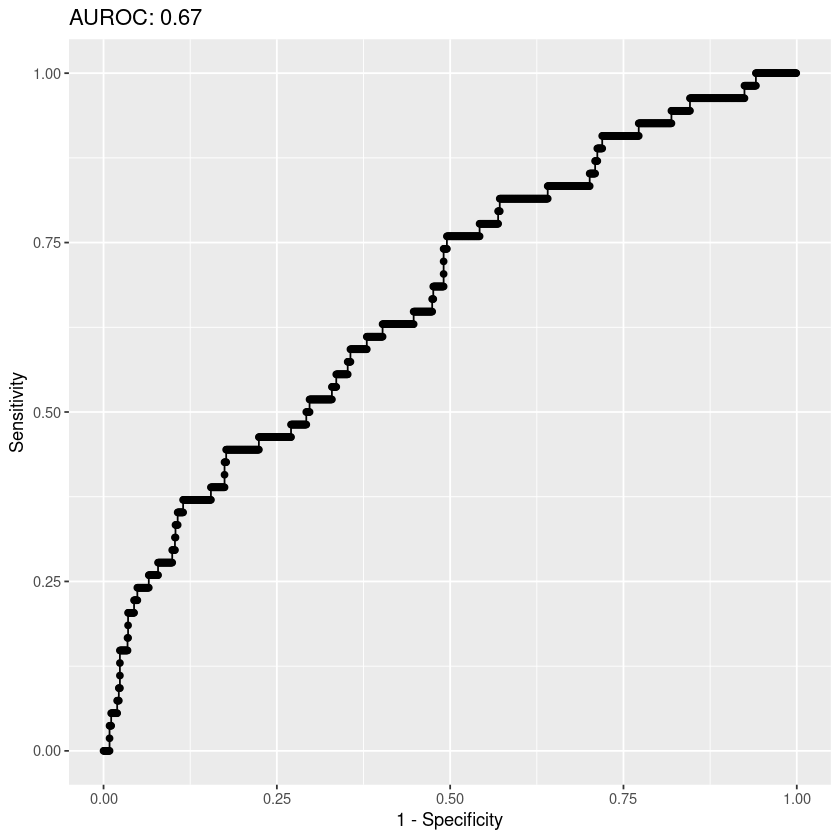

In [30]:
dat = dat_score
vec_boo_actual = (dat$CRISPRi_Label == "CRISPRi-HCRFF_A")
vec_num_score  = dat$Score

lst = fun_auroc(vec_boo_actual, vec_num_score)
vec_num_spec = lst[["Specificity"]]
vec_num_sens = lst[["Sensitivity"]]
num_auroc    = lst[["AUROC"]]

txt = paste("AUROC:", round(num_auroc, 2))
dat = data.frame(
    "x" = 1 - lst[["Specificity"]],
    "y" = lst[["Sensitivity"]]
)
dat = dat %>% dplyr::arrange(x, y)
gpt = ggplot(dat, aes(x=x, y=y)) +
    geom_line() +
    geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity", title = txt)
print(gpt)

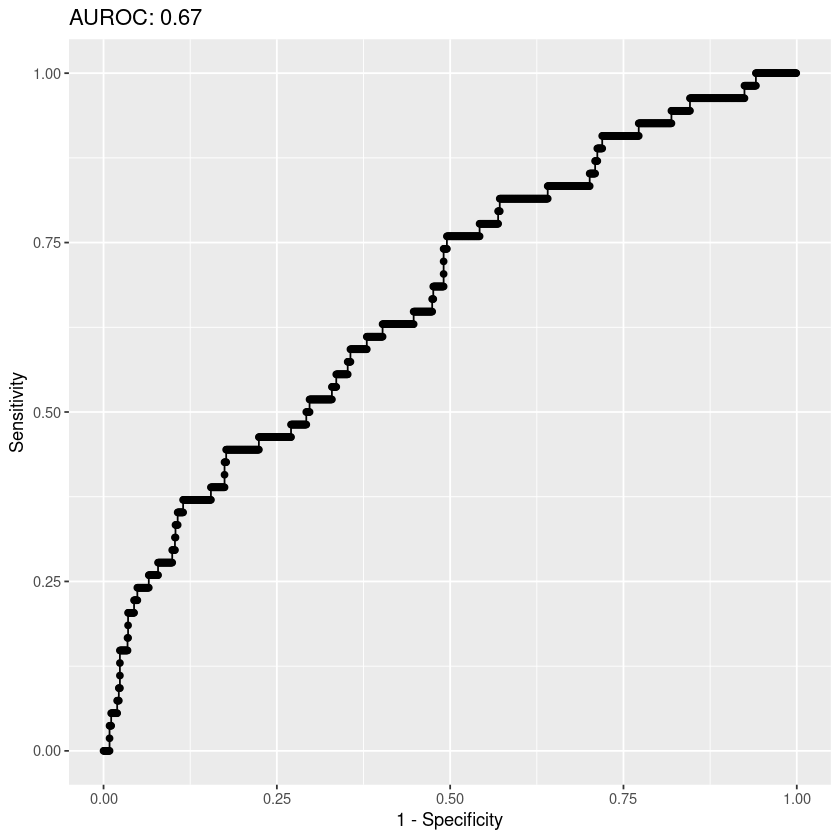

In [31]:
dat = dat_score
txt = "CRISPRi-HCRFF"
vec = paste(txt, c("I", "A"), sep="_")
dat = dat %>% dplyr::mutate(CRISPRi_Label = factor(CRISPRi_Label, levels = vec))

fit = glm(CRISPRi_Label ~ Score, data = dat, family = "binomial")

vec_boo_actual = (dat$CRISPRi_Label == "CRISPRi-HCRFF_A")
vec_num_score = predict(fit, type = "response")
#vec_num_score  = dat$Score

lst = fun_auroc(vec_boo_actual, vec_num_score)
vec_num_spec = lst[["Specificity"]]
vec_num_sens = lst[["Sensitivity"]]
num_auroc    = lst[["AUROC"]]

txt = paste("AUROC:", round(num_auroc, 2))
dat = data.frame(
    "x" = 1 - lst[["Specificity"]],
    "y" = lst[["Sensitivity"]]
)
dat = dat %>% dplyr::arrange(x, y)
gpt = ggplot(dat, aes(x=x, y=y)) +
    geom_line() +
    geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity", title = txt)
print(gpt)

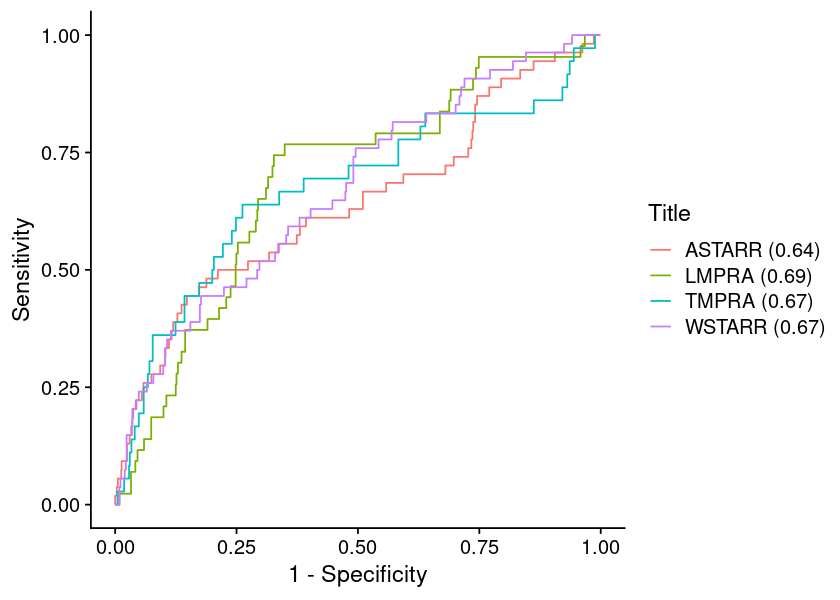

In [65]:
dat = dat_peak_atac_fcc_total

lst = split(dat, dat$Assay_Type)
vec = c("ASTARR", "WSTARR", "TMPRA", "LMPRA")
lst = lst[vec]

lst = lapply(lst, function(dat){
    
    txt = "CRISPRi-HCRFF"
    vec = paste(txt, c("I", "A"), sep="_")
    dat = dat %>% 
        dplyr::inner_join(dat_peak_label_crispri_hcrff, by="Peak") %>%     
        dplyr::mutate(CRISPRi_Label = factor(CRISPRi_Label, levels = vec))
    
    fit = glm(CRISPRi_Label ~ Score, data = dat, family = "binomial")
    vec_boo_actual = (dat$CRISPRi_Label == "CRISPRi-HCRFF_A")
    vec_num_score = predict(fit, type = "response")

    lst = fun_auroc(vec_boo_actual, vec_num_score)
    vec_num_spec = lst[["Specificity"]]
    vec_num_sens = lst[["Sensitivity"]]
    num_auroc    = lst[["AUROC"]]
    txt_assay    = unique(dat$Assay_Type)

    txt_title = paste0("(", round(num_auroc, 2), ")")
    txt_title = paste(txt_assay, txt_title)
    
    dat = data.frame(
        "x" = 1 - lst[["Specificity"]],
        "y" = lst[["Sensitivity"]],
        "Assay" = txt_assay,
        "AUROC" = num_auroc,
        "Title" = txt_title
    )
    dat = dat %>% dplyr::arrange(x, y)
    return(dat)
})


dat = bind_rows(lst)
gpt = ggplot(dat, aes(x=x, y=y, group=Assay, color=Title)) +
    geom_line() +
    #geom_point() +
    labs(x = "1 - Specificity", y = "Sensitivity") +
    theme_cowplot()

options(repr.plot.width=7, repr.plot.height=5)
print(gpt)

In [22]:
dat = dat_peak_atac_fcc_total
lst = split(dat, dat$Assay_Type)

txt = "ASTARR"
dat = lst[[txt]]
dat = dat %>% dplyr::right_join(dat_peak_label_crispri_hcrff, by="Peak")

head(dat)

Chrom,Start,End,Peak,Score,Assay_Type,Assay_Label,CRISPRi_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr11,33065336,33066228,chr11:33065336-33066228,-0.8320223,ASTARR,ASTARR_T,CRISPRi-HCRFF_I
chr11,33068519,33069100,chr11:33068519-33069100,-0.2393418,ASTARR,ASTARR_T,CRISPRi-HCRFF_I
chr11,33072412,33072630,chr11:33072412-33072630,-0.9603731,ASTARR,ASTARR_T,CRISPRi-HCRFF_I
chr11,33103533,33104120,chr11:33103533-33104120,-0.3136428,ASTARR,ASTARR_T,CRISPRi-HCRFF_I
chr11,33114629,33115134,chr11:33114629-33115134,-0.3772960,ASTARR,ASTARR_T,CRISPRi-HCRFF_I
chr11,33125296,33126416,chr11:33125296-33126416,0.2643755,ASTARR,ASTARR_T,CRISPRi-HCRFF_I


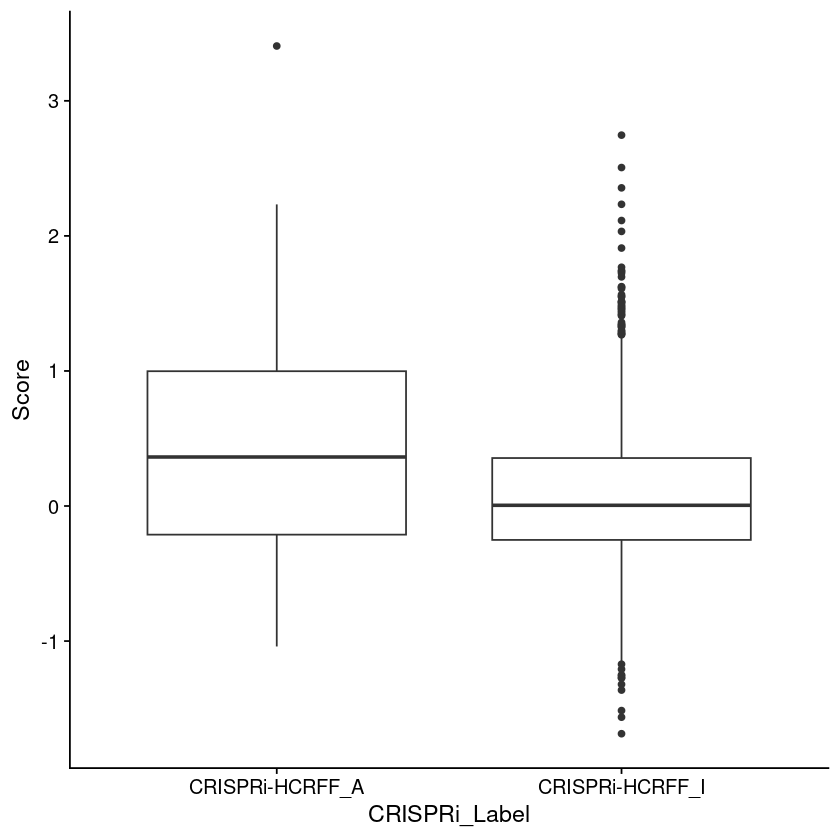

In [27]:
gpt = ggplot(dat, aes(x=CRISPRi_Label, y=Score)) + geom_boxplot() + theme_cowplot()
print(gpt)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


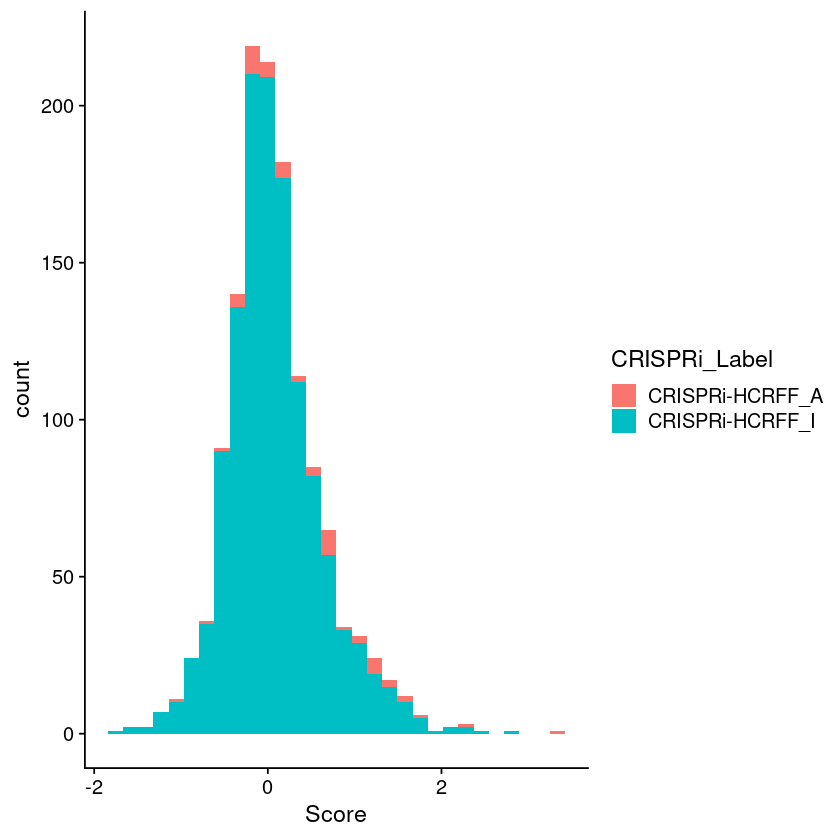

In [25]:
gpt = ggplot(dat, aes(x=Score, fill=CRISPRi_Label)) + geom_histogram() + theme_cowplot()
print(gpt)